In [19]:
from __future__ import print_function
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
sys.path.append(module_path)

import numpy as np
import math
import copy
import pandas as pd
import scipy.stats as ss
import pickle
import matplotlib.pylab as plt
import matplotlib.patches as mpatches

## Plots

In [20]:
# Aggregation with M = 2
with open("accsPart2.pkl", "rb") as f:
    accsLRPart2 = pickle.load(f)
with open("accsAggr2.pkl", "rb") as f:
    accsLRAggr2 = pickle.load(f)

# # Aggregation with M = 4
with open("accsPart4.pkl", "rb") as f:
    accsLRPart4 = pickle.load(f)
with open("accsAggr4.pkl", "rb") as f:
    accsLRAggr4 = pickle.load(f)

# Aggregation with M = 8
with open("accsPart8.pkl", "rb") as f:
    accsLRPart8 = pickle.load(f)
with open("accsAggr8.pkl", "rb") as f:
    accsLRAggr8 = pickle.load(f)

# Single Model
with open("accsSingle.pkl", "rb") as f:
    accsLRSingle = pickle.load(f)

In [23]:
lrs = [2048,4096, 8192]
samples = 100

In [24]:
means_single = [np.max(accsLRSingle[lr][1]) for lr in lrs]
max_mean_single, argmax_mean_single = np.max(means_single), np.argmax(means_single)

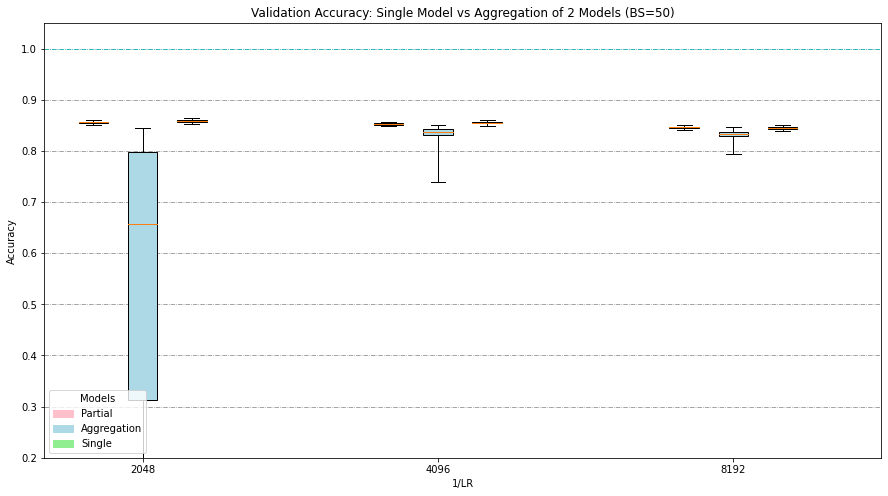

In [25]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()
ax.set_title('Validation Accuracy: Single Model vs Aggregation of 2 Models (BS=50)')

accsPart2 = [accsLRPart2[lr][1] for lr in lrs]
accsAggr2 = [accsLRAggr2[lr] for lr in lrs]
accsSingle = [accsLRSingle[lr][1] for lr in lrs]

part2_plot = plt.boxplot(accsPart2, positions=np.array(np.arange(len(accsPart2)))*3.0-0.5, widths=0.3, 
                           patch_artist=True, boxprops=dict(facecolor='pink'), whis=99)
aggr2_plot = plt.boxplot(accsAggr2, positions=np.array(np.arange(len(accsAggr2)))*3.0, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightblue'), whis=99)
single_plot = plt.boxplot(accsSingle, positions=np.array(np.arange(len(accsSingle)))*3.0+0.5, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightgreen'), whis=99)

plt.axhline(y = 1, color = 'c', linestyle = '-.', linewidth = 0.7)    
plt.xticks(np.arange(0, (len(lrs)-0.5) * 3, 3), lrs)
plt.xlim(-1, (len(lrs)-0.5)*3)

ax.set(ylabel='Accuracy', xlabel='1/LR')
plt.grid(True, axis='y', color = 'tab:gray', linestyle = '-.', linewidth = 0.7)
plt.ylim([0.2, 1.05])

part_patch = mpatches.Patch(color='pink', label='Partial')
aggr_patch = mpatches.Patch(color='lightblue', label='Aggregation')
sing_patch = mpatches.Patch(color='lightgreen', label='Single')
plt.legend(handles=[part_patch, aggr_patch, sing_patch], loc=3, title='Models')

plt.show()

In [26]:
means_aggr_2 = [np.mean(accsLRAggr2[lr]) for lr in lrs]
max_mean_aggr2, argmax_mean_aggr2 = np.max(means_aggr_2), np.argmax(means_aggr_2)

print("Mean 2 aggregated models with lr = " + str(lrs[argmax_mean_aggr2]) + " : " + str(max_mean_aggr2))
print("Mean single models with lr = " + str(lrs[argmax_mean_single]) + " : " + str(max_mean_single))

diff = round(np.subtract(max_mean_aggr2, max_mean_single), 4)

print("Mean difference Single-2 Aggregated models: " + str(diff))

Mean 2 aggregated models with lr = 4096 : 0.8336070000000001
Mean single models with lr = 2048 : 0.8640000000000001
Mean difference Single-2 Aggregated models: -0.0304


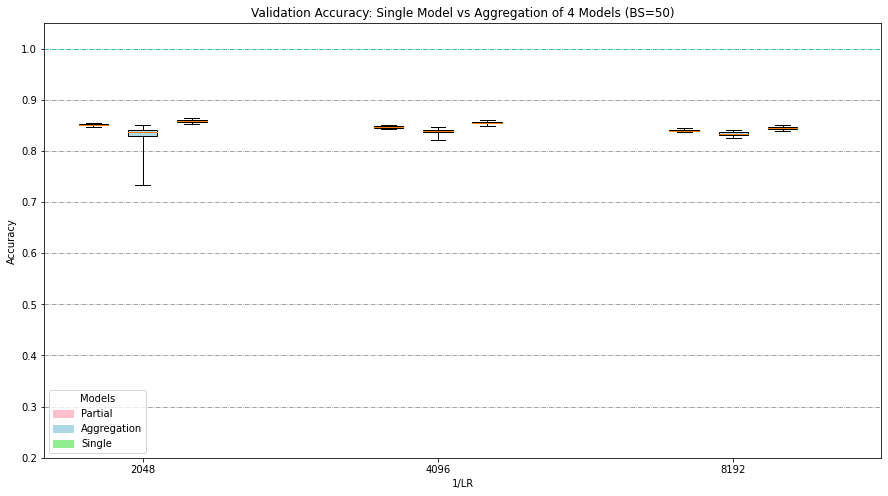

In [13]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()
ax.set_title('Validation Accuracy: Single Model vs Aggregation of 4 Models (BS=50)')

accsPart4 = [accsLRPart4[lr][1] for lr in lrs]
accsAggr4 = [accsLRAggr4[lr] for lr in lrs]
accsSingle = [accsLRSingle[lr][1] for lr in lrs]

part4_plot = plt.boxplot(accsPart4, positions=np.array(np.arange(len(accsPart4)))*3.0-0.5, widths=0.3, 
                           patch_artist=True, boxprops=dict(facecolor='pink'), whis=99)
aggr4_plot = plt.boxplot(accsAggr4, positions=np.array(np.arange(len(accsAggr4)))*3.0, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightblue'), whis=99)
single_plot = plt.boxplot(accsSingle, positions=np.array(np.arange(len(accsSingle)))*3.0+0.5, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightgreen'), whis=99)

plt.axhline(y = 1, color = 'c', linestyle = '-.', linewidth = 0.7)    
plt.xticks(np.arange(0, (len(lrs)-0.5) * 3, 3), lrs)
plt.xlim(-1, (len(lrs)-0.5)*3)

ax.set(ylabel='Accuracy', xlabel='1/LR')
plt.grid(True, axis='y', color = 'tab:gray', linestyle = '-.', linewidth = 0.7)
plt.ylim([0.2, 1.05])

part_patch = mpatches.Patch(color='pink', label='Partial')
aggr_patch = mpatches.Patch(color='lightblue', label='Aggregation')
sing_patch = mpatches.Patch(color='lightgreen', label='Single')
plt.legend(handles=[part_patch, aggr_patch, sing_patch], loc=3, title='Models')

plt.show()

In [14]:
means_aggr_4 = [np.mean(accsLRAggr4[lr]) for lr in lrs]
max_mean_aggr4, argmax_mean_aggr4 = np.max(means_aggr_4), np.argmax(means_aggr_4)

print("Mean 4 aggregated models with lr = " + str(lrs[argmax_mean_aggr4]) + " : " + str(max_mean_aggr4))
print("Mean single models with lr = " + str(lrs[argmax_mean_single]) + " : " + str(max_mean_single))

diff = round(np.subtract(max_mean_aggr4, max_mean_single), 4)

print("Mean difference Single-4 Aggregated models: " + str(diff))

Mean 4 aggregated models with lr = 4096 : 0.8388310000000001
Mean single models with lr = 2048 : 0.8640000000000001
Mean difference Single-4 Aggregated models: -0.0252


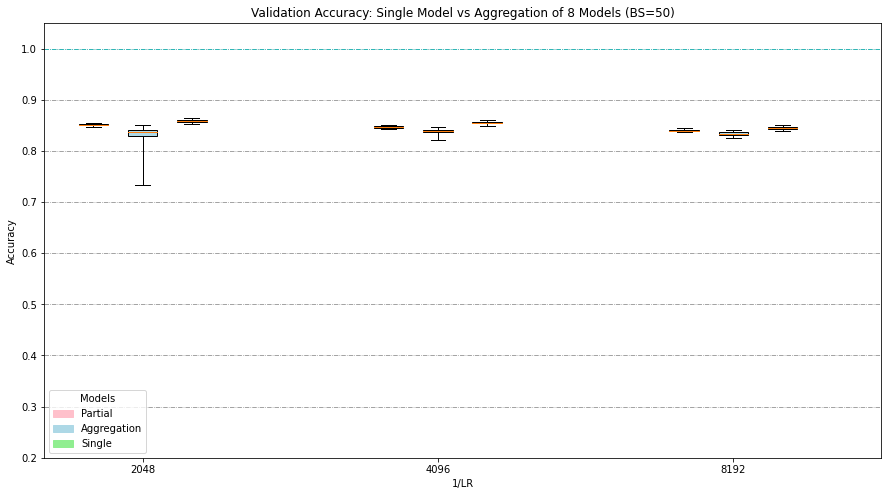

In [15]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()
ax.set_title('Validation Accuracy: Single Model vs Aggregation of 8 Models (BS=50)')

accsPart8 = [accsLRPart8[lr][1] for lr in lrs]
accsAggr8 = [accsLRAggr8[lr] for lr in lrs]
accsSingle = [accsLRSingle[lr][1] for lr in lrs]

part8_plot = plt.boxplot(accsPart4, positions=np.array(np.arange(len(accsPart8)))*3.0-0.5, widths=0.3, 
                           patch_artist=True, boxprops=dict(facecolor='pink'), whis=99)
aggr8_plot = plt.boxplot(accsAggr4, positions=np.array(np.arange(len(accsAggr8)))*3.0, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightblue'), whis=99)
single_plot = plt.boxplot(accsSingle, positions=np.array(np.arange(len(accsSingle)))*3.0+0.5, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightgreen'), whis=99)

plt.axhline(y = 1, color = 'c', linestyle = '-.', linewidth = 0.7)    
plt.xticks(np.arange(0, (len(lrs)-0.5) * 3, 3), lrs)
plt.xlim(-1, (len(lrs)-0.5)*3)

ax.set(ylabel='Accuracy', xlabel='1/LR')
plt.grid(True, axis='y', color = 'tab:gray', linestyle = '-.', linewidth = 0.7)
plt.ylim([0.2, 1.05])

part_patch = mpatches.Patch(color='pink', label='Partial')
aggr_patch = mpatches.Patch(color='lightblue', label='Aggregation')
sing_patch = mpatches.Patch(color='lightgreen', label='Single')
plt.legend(handles=[part_patch, aggr_patch, sing_patch], loc=3, title='Models')

plt.show()

In [16]:
means_aggr_8 = [np.mean(accsLRAggr8[lr]) for lr in lrs]
max_mean_aggr8, argmax_mean_aggr8 = np.max(means_aggr_8), np.argmax(means_aggr_8)

print("Mean 8 aggregated models with lr = " + str(lrs[argmax_mean_aggr8]) + " : " + str(max_mean_aggr8))
print("Mean single models with lr = " + str(lrs[argmax_mean_single]) + " : " + str(max_mean_single))

diff = round(np.subtract(max_mean_aggr8, max_mean_single), 4)

print("Mean difference Single-8 Aggregated models: " + str(diff))

Mean 8 aggregated models with lr = 2048 : 0.835826
Mean single models with lr = 2048 : 0.8640000000000001
Mean difference Single-8 Aggregated models: -0.0282
